In [ ]:
import pandas as pd
import os
import cv2
import sys
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
training_videos_path = os.getcwd() + '/MLDS_hw2_data/training_data/video'

In [ ]:
training_videos_path

'/content\\MLDS_hw2_data\\training_data\\video'

In [ ]:
from os import walk

_, _, filenames = next(walk(training_videos_path))

In [ ]:
filenames

['eZLxohGP4IE_15_25.avi']

In [ ]:
working_filenames = [x for x in filenames if not x.startswith('.')]

In [ ]:
working_filenames[0]

'eZLxohGP4IE_15_25.avi'

In [ ]:
working_video_names = [x[:-4] for x in working_filenames]
working_video_names

['eZLxohGP4IE_15_25']

In [ ]:
def extract_frames_from_video(video_name):
    path_in = os.getcwd() + '/MLDS_hw2_data/training_data/video/' + video_name + '.avi'
    
    cap = cv2.VideoCapture(path_in)
    cap.set(cv2.CAP_PROP_POS_AVI_RATIO,0)
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    videoFPS = int(cap.get(cv2.CAP_PROP_FPS))

    buf = np.empty((
        frameCount,
        frameHeight,
        frameWidth,
        3), np.dtype('uint8'))

    fc = 0
    ret = True

    while (fc < frameCount):
        ret, buf[fc] = cap.read()
        fc += 1

    cap.release()
    videoArray = buf

    representative_frames = buf[::videoFPS, :, :, :]
    return representative_frames

In [ ]:
frames = extract_frames_from_video('eZLxohGP4IE_15_25')

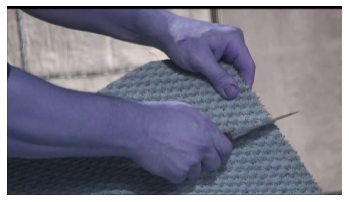

In [ ]:
plt.imshow(frames[0], interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
                   trainable=False),  # Can be True, see below.
])

In [ ]:
m.build([None, 600, 600, 3])  # Batch input shape.

In [ ]:
def extract_features_from_video_frames(video_name):
    representative_frames = extract_frames_from_video(video_name)
    representative_frames = representative_frames / 255
    resized_frames = tf.image.resize_with_crop_or_pad(representative_frames, 600, 600)
    frames_features = m.predict(resized_frames)
    return frames_features

In [ ]:
features = extract_features_from_video_frames(working_video_names[0])

In [ ]:
features.shape

(11, 2560)

In [ ]:
features_path = os.getcwd() + '/MLDS_hw2_data/training_data/video_frame_features/'
np.save(features_path + working_video_names[0], features)

In [ ]:
def save_features_from_video_frames(video_name):
    representative_frames = extract_frames_from_video(video_name)
    representative_frames = representative_frames / 255
    resized_frames = tf.image.resize_with_crop_or_pad(representative_frames, 600, 600)
    frames_features = m.predict(resized_frames)
    
    features_path = os.getcwd() + '/MLDS_hw2_data/training_data/video_frame_features/'
    np.save(features_path + video_name, frames_features)

In [ ]:
from tqdm import tqdm

In [ ]:
for i in tqdm(range(len(working_video_names))):
    save_features_from_video_frames(working_video_names[i])

In [ ]:
!pip install pyunpack
!pip install patool

     |████████████████████████████████| 81kB 3.1MB/s 


In [ ]:
from pyunpack import Archive

In [ ]:
Archive('/content/MLDS_hw2_data/training_data/video/training_sample.rar').extractall('/content/MLDS_hw2_data/training_data/video')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')